<a href="https://colab.research.google.com/github/KhareShruti/IBM-Internship/blob/main/Sentiment_Analysis_Of_Restraunt_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *SENTIMENT ANALYSIS OF RESTRAUNT REVIEWS*

Here, the dataset used contains 1000 rows with two functions-
Reviews and Likes.

**These major steps are performed to analyse the dataset :-**

**1. Importing Libraries**

**2. Exploratory Data Analysis**

**3. Model Training**

**4. Predictions**

**5. Analysis Conclusion**

### ***IMPORTING LIBRARIES***

In [ ]:
# Connecting Google Drive with Google Colab

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING LIBRARIES

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data manipulation
import warnings
warnings.filterwarnings('ignore')

### ***EXPLORATORY DATA ANALYSIS (EDA)***


Exploratory data analysis is an analysis technique to analyze and investigate the data set and summaries the main characteristics of the dataset.

**IMPORTING** **DATA**

In [ ]:
# Loading dataset

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv" , delimiter="\t", quoting=3)

**DESCRIPTIVE DATA ANALYSIS**

In [ ]:
# Will give tuple of array dimension = (row,column)

data.shape

(1000, 2)

In [ ]:
# Give information about DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Return label of each column in the DataFrame

data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
# View the data

data.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
# View the data

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, good_reviews_count)

(500, 500)

**DATA PRE-PROCESSING**

In [ ]:
# Importing essential libraries for performing Natural Language Processing

import nltk #Natural Language Toolkit, Python Package used for NLP
import re #Built-in package used for Regural Expression
nltk.download('stopwords')
from nltk.corpus import stopwords #A Stopword is commonly used word that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer #Type of stemmer mainly known for Data Mining

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [ ]:
corpus[:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

### ***WORD CLOUD***

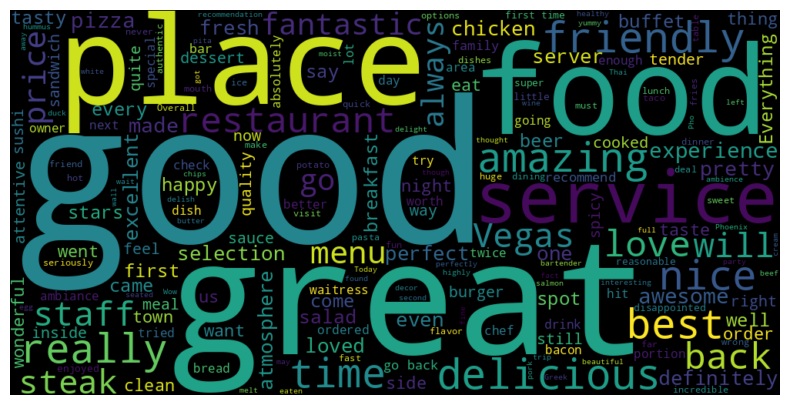

In [ ]:
# importing library for WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 1,:]       # Positive review
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=1000, height=500,background_color='black').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

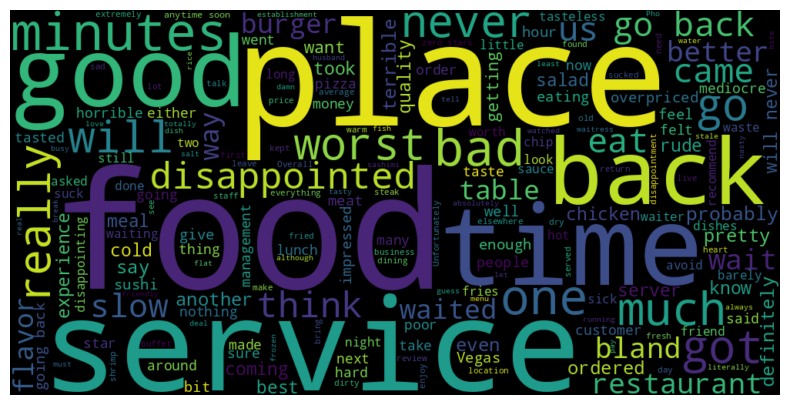

In [ ]:
# importing library for WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 0,:]    # Negative review
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=1000, height=500,background_color='black').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### ***Bag of Words model***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  #CountVectorization is a method to convert textual data to numerical data
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

### ***DATA SPLITTING***



*Here, we are going to split the data in two parts (Training and Testing), so that we can train our model on training dataset and test its accuracy on unseen data.*

In [ ]:
from sklearn.model_selection import train_test_split #Use to split original data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Random_state simply sets seed to random generator, otherwise if you dont set it, it will be different everytime.
#1000*80/100 = 800 (Samples used for training)
#1000*200/100 = 200 (Samples used for testing)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

### ***MODEL TRAINING***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (LogisticRegression)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define a dictionary called models that contains various machine learning models as values, with their names as keys.
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
}

# Create an empty dictionary to store model accuracies and their differences
model_accuracies = {}
model_accuracies_diff = {}

# Specify the number of folds
num_folds = 10

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=45)

# Loop through each model and train/evaluate it with k-fold cross-validation
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate the average training and testing accuracy across all folds
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    # Calculate the difference between training and testing accuracy
    accuracy_diff = abs(average_train_accuracy - average_test_accuracy)
    # Print training and testing accuracy for the model
    print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%")
    print(f"{model_name} : Testing Accuracy={average_test_accuracy * 100:.2f}%")
    print(f"{model_name} : Accuracy Difference={accuracy_diff * 100:.2f}%\n")

    # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
    model_accuracies[model_name] = average_test_accuracy
    model_accuracies_diff[model_name] = accuracy_diff

# Sort the models based on the absolute difference between training and testing accuracy
sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
print("-"*149)
print("Best Models (Closest Training and Testing Accuracy):")
print()
print("-"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")

# Print the model with the smallest accuracy difference (best model)
best_model_name = sorted_models[0][0]
print("-"*149)
print(f"The Best Model from the above results is: {best_model_name}")
print("-"*149)


MultinomialNB: Training Accuracy=93.38%
MultinomialNB : Testing Accuracy=76.50%
MultinomialNB : Accuracy Difference=16.88%

RandomForestClassifier: Training Accuracy=99.70%
RandomForestClassifier : Testing Accuracy=74.10%
RandomForestClassifier : Accuracy Difference=25.60%

AdaBoostClassifier: Training Accuracy=81.31%
AdaBoostClassifier : Testing Accuracy=74.90%
AdaBoostClassifier : Accuracy Difference=6.41%

SVC: Training Accuracy=96.09%
SVC : Testing Accuracy=78.00%
SVC : Accuracy Difference=18.09%

LinearSVC: Training Accuracy=99.26%
LinearSVC : Testing Accuracy=77.50%
LinearSVC : Accuracy Difference=21.76%

NuSVC: Training Accuracy=98.60%
NuSVC : Testing Accuracy=78.40%
NuSVC : Accuracy Difference=20.20%

LogisticRegression: Training Accuracy=95.93%
LogisticRegression : Testing Accuracy=77.90%
LogisticRegression : Accuracy Difference=18.03%


---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### ***• AdaBoostClassifier***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 10

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=45)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
confusion_matrices = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision and recall score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)

    # Calculate and store the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Calculate the average precision and recall score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

# Print the results
print("AdaBoostClassifier Results:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)

AdaBoostClassifier Results:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 81.31%
Average Testing Accuracy: 74.90%
Average Accuracies Difference: 5.88%
Average Precision: 0.86
Average Recall: 0.60
------------------------------------------------------------------------------------------------------------------------------------------------------


**Confusion Matrix**

In [ ]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")


Confusion Matrix - Fold 11:
[[52  6]
 [14 28]]


**Confusion Matrix Visualization**

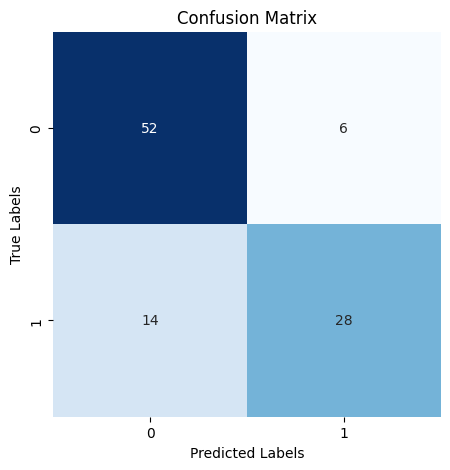

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


### ***• USING STRATIFIED K-FOLD***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 7
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=40)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
confusion_matrices = []

# Loop through each fold
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision and recall score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)

# Calculate the average precision and recall score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

# Print the results
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 81.55%
Average Testing Accuracy: 75.30%
Average Accuracies Difference: 4.07%
Average Precision: 0.85
Average Recall: 0.61
------------------------------------------------------------------------------------------------------------------------------------------------------


**Confusion Matrix**

In [ ]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")


Confusion Matrix - Fold 1:
[[64  7]
 [27 44]]


**Confusion Matrix Visualization**

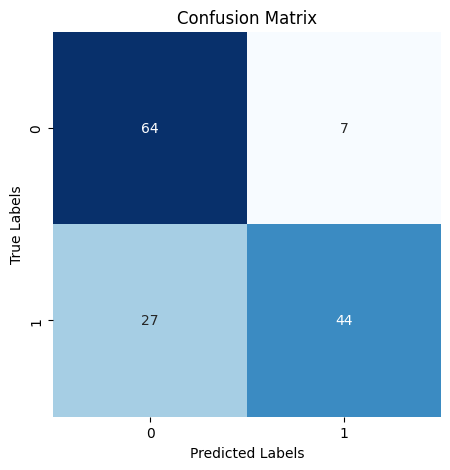

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### ***Average Training and Testing Accuracies Visualization***

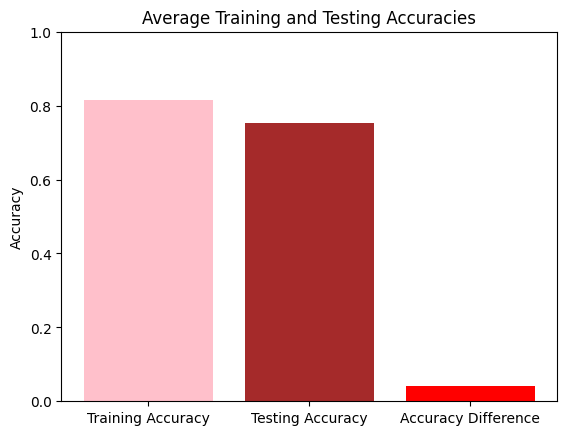

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['pink', 'brown', 'red'])
plt.figsize=(3, 3)
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()


### ***PREDICTIONS***

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)


In [ ]:
# Sample reviews as strings
reviews = [
    'The selection on the menu was great and so were the prices.',
    'Not tasty and the texture was just nasty',
    'Wow... Loved this place.',
    "Service was not very prompt.",
]

# Assuming you have already defined the 'predict_sentiment' function, classifier, and cv

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()


Review: 'The selection on the menu was great and so were the prices.'
Sentiment: POSITIVE

Review: 'Not tasty and the texture was just nasty'
Sentiment: NEGATIVE

Review: 'Wow... Loved this place.'
Sentiment: POSITIVE

Review: 'Service was not very prompt.'
Sentiment: NEGATIVE



**In this notebook, an attempt has been made to classify Sentiment Analysis for Restaurant Reviews using Machine Learning techniques.**

**Evaluation metrics used here are:**

---

**Using AdaBoostClassifier,**
*   Training Accuracy: 81.31 %
*   Testing Accuracy: 74.90 %
*   Difference b/w both accuracies: 5.88 %
*   Precision Score: 0.86
*   Recall score: 0.60

---

**Using AdaBoostClassifier with Stratified K-Fold,**
*   Training Accuracy: 81.55 %
*   Testing Accuracy: 75.30 %
*   Difference b/w both accuracies: 4.07 %
*   Precision Score: 0.85
*   Recall score: 0.61

---

*From the above results, **AdaBoostClassifier with Stratified K-FoldCross Validation Technique is slightly better method** compared to others, with 81.55% as Training accuracy and 75.30% as Testing Accuracy which means the model built for the prediction of sentiment analysis of the restaurant reviews gives **75.30% right prediction**.*